# Colon Cancer Drug Response Prediction

In [1]:
import pandas as pd

In [2]:
file_path = "raw_colon_cancer_data.csv"
df = pd.read_csv(file_path)
df.shape

(7643, 82)

In [3]:
df.head()

,Patient_ID,Gene_1,Gene_2,Gene_3,Gene_4,Gene_5,Gene_6,Gene_7,Gene_8,Gene_9,...,Pathway_2,Pathway_3,Pathway_4,Pathway_5,Drug_Response,Resistance_Mechanisms,Metabolism_Pathway,Toxicity_Risk,Survival_Outcome,Treatment_Dosage
0,Patient_1,3.745401,9.507143,7.319939,5.986585,1.560186,1.559945,0.580836,8.661761,6.011150,...,High,Moderate,Moderate,Low,9.440715,1,Slow,2,61.397774,1.406563
1,Patient_2,9.695846,7.751328,9.394989,8.948274,5.979000,9.218742,0.884925,1.959829,0.452273,...,Low,High,High,Low,8.917807,1,Slow,1,73.403613,1.747822
2,Patient_3,0.314292,6.364104,3.143560,5.085707,9.075665,2.492922,4.103829,7.555511,2.287982,...,Low,High,Low,Low,9.062609,1,Fast,0,32.380910,4.145579
3,Patient_4,9.082659,2.395619,1.448949,4.894528,9.856505,2.420553,6.721355,7.616196,2.376375,...,Moderate,High,Low,High,9.030050,1,Normal,2,15.973868,1.153012
4,Patient_5,6.420316,0.841400,1.616287,8.985542,6.064291,0.091971,1.014715,6.635018,0.050616,...,Low,High,Moderate,High,8.750172,1,Slow,0,70.589234,2.438964


## Data preparation

In [4]:
print(df.columns)

Index(['Patient_ID', 'Gene_1', 'Gene_2', 'Gene_3', 'Gene_4', 'Gene_5',
       'Gene_6', 'Gene_7', 'Gene_8', 'Gene_9', 'Gene_10', 'Gene_11', 'Gene_12',
       'Gene_13', 'Gene_14', 'Gene_15', 'Gene_16', 'Gene_17', 'Gene_18',
       'Gene_19', 'Gene_20', 'Gene_21', 'Gene_22', 'Gene_23', 'Gene_24',
       'Gene_25', 'Gene_26', 'Gene_27', 'Gene_28', 'Gene_29', 'Gene_30',
       'Gene_31', 'Gene_32', 'Gene_33', 'Gene_34', 'Gene_35', 'Gene_36',
       'Gene_37', 'Gene_38', 'Gene_39', 'Gene_40', 'Gene_41', 'Gene_42',
       'Gene_43', 'Gene_44', 'Gene_45', 'Gene_46', 'Gene_47', 'Gene_48',
       'Gene_49', 'Gene_50', 'Mutation_1', 'Mutation_2', 'Mutation_3',
       'Mutation_4', 'Mutation_5', 'Mutation_6', 'Mutation_7', 'Mutation_8',
       'Mutation_9', 'Mutation_10', 'Protein_Score_1', 'Protein_Score_2',
       'Protein_Score_3', 'Protein_Score_4', 'Protein_Score_5',
       'Protein_Score_6', 'Protein_Score_7', 'Protein_Score_8',
       'Protein_Score_9', 'Protein_Score_10', 'Pathway_1', 'P

### Features

In [5]:
# Input features: genes expression, protein interaction scores and pathway alteration.
genes = df[[f"Gene_{i}" for i in range(1,51)]]
proteins = df[[f"Protein_Score_{i}" for i in range(1,11)]]

# In Pathway Alterations, replace Low, Moderate and High values with 0, 1 and 2
pathway = df[[f"Pathway_{i}" for i in range(1,6)]].replace({'Low':0, 'Moderate':1, 'High':2})
print(pathway)

# Output feature: Drug Response
drug = df[["Drug_Response"]]

# Concatenate features and drop NaN values
features = pd.concat([genes, proteins, pathway, drug], axis=1)
features = features.dropna() #Check if there are NaN values
print(features)

      Pathway_1  Pathway_2  Pathway_3  Pathway_4  Pathway_5
0             0          2          1          1          0
1             0          0          2          2          0
2             2          0          2          0          0
3             1          1          2          0          2
4             0          0          2          1          2
...         ...        ...        ...        ...        ...
7638          0          1          2          0          1
7639          2          0          0          0          1
7640          0          2          2          0          0
7641          2          0          2          2          0
7642          1          2          2          1          0

[7643 rows x 5 columns]
        Gene_1    Gene_2    Gene_3    Gene_4    Gene_5    Gene_6    Gene_7   
0     3.745401  9.507143  7.319939  5.986585  1.560186  1.559945  0.580836  \
1     9.695846  7.751328  9.394989  8.948274  5.979000  9.218742  0.884925   
2     0.314292  6.364

### Input Features

In [6]:
# Normalize input features
X = features.drop(columns=["Drug_Response"])
X_norm = X/X.max()
print(f"Input Features: {X_norm}")

Input Features:         Gene_1    Gene_2    Gene_3    Gene_4    Gene_5    Gene_6    Gene_7   
0     0.374591  0.950913  0.732010  0.598741  0.156022  0.156023  0.058093  \
1     0.969718  0.775294  0.939520  0.894950  0.597912  0.922042  0.088506   
2     0.031433  0.636543  0.314363  0.508641  0.907585  0.249338  0.410448   
3     0.908390  0.239612  0.144898  0.489520  0.985671  0.242099  0.672241   
4     0.642120  0.084158  0.161632  0.898678  0.606442  0.009199  0.101488   
...        ...       ...       ...       ...       ...       ...       ...   
7638  0.330332  0.358962  0.854164  0.947276  0.115049  0.886734  0.474376   
7639  0.476022  0.311498  0.918930  0.678686  0.603437  0.970620  0.015995   
7640  0.637494  0.605048  0.515037  0.133002  0.714843  0.404648  0.032071   
7641  0.302282  0.001644  0.240158  0.936705  0.203650  0.123502  0.313477   
7642  0.685166  0.510375  0.877597  0.167343  0.271142  0.424402  0.202198   

        Gene_8    Gene_9   Gene_10  ...  Protei

### Output Features

In [7]:
# Normalize output features
y = features[["Drug_Response"]]
y_norm= y/y.max()
print(y_norm)

      Drug_Response
0          0.944284
1          0.891982
2          0.906465
3          0.903208
4          0.875214
...             ...
7638       0.920903
7639       0.659831
7640       0.085402
7641       0.493633
7642       0.561540

[7643 rows x 1 columns]


### Split dataset (into training and test datasets)

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_norm,y_norm, test_size=0.2, random_state=42) 
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)
print(y_train, y_test)

(6114, 65) (1529, 65)
(6114, 1) (1529, 1)
      Drug_Response
1513       0.276706
216        0.751731
5879       0.193245
5169       0.760038
421        0.342367
...             ...
5226       0.961822
5390       0.286874
860        0.568764
7603       0.460677
7270       0.062184

[6114 rows x 1 columns]       Drug_Response
7503       0.819541
7478       0.444424
2462       0.888690
4507       0.556280
2973       0.419219
...             ...
2543       0.706724
5993       0.565485
1192       0.384553
5440       0.423204
7358       0.034202

[1529 rows x 1 columns]


## ML model construction and workflow development

### Alice's models

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def evaluate_model(y_true, y_pred, tolerance=0.1):
    '''
    Function to evaluate the model performance.
    
    Input:
        y_true: True drug response values (1D array)
        y_pred: Predicted drug response values (1D array)
        
    Output:
        Prints Mean Squared Error, R-squared and mseuracy metrics.
    '''
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mseuracy = np.mean(np.abs(y_true - y_pred) < tolerance)
    
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")
    print(f"mseuracy (within tolerance {tolerance}): {mseuracy * 100:.2f}%")


def visualize_predictions(y_true, y_pred):
    ''' 
    Function to visualize the predictions of the model.

    Input:
        y_true: True drug response values (1D array)
        y_pred: Predicted drug response values (1D array)

    Output:
        Two plots: Residual plot and Prediction vs Actual plot
    '''
    # Residual Plot
    residuals = y_true - y_pred
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=y_pred, y=residuals)
    plt.hlines(y=0, xmin=min(y_pred), xmax=max(y_pred), colors='r', linestyles='--')
    plt.title('Residual Plot')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.show()
    
    # Prediction vs Actual Plot
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.title('True vs Predicted Drug Response')
    plt.show()

#### Ridge Regression

[0.27670629 0.75173133 0.19324471 ... 0.56876396 0.46067743 0.06218448] [0.50374077 0.45300751 0.53852165 ... 0.51284313 0.51264541 0.48851334]
[0.81954062 0.44442387 0.88868954 ... 0.38455258 0.42320353 0.0342018 ] [0.50254861 0.49786059 0.5156964  ... 0.44393614 0.47416469 0.51024851]
Training Data Evaluation:
Mean Squared Error: 0.07935632570376042
R-squared: 0.015138825904808528
Accuracy (within tolerance 0.1): 20.22%
Testing Data Evaluation:
Mean Squared Error: 0.08299492989815206
R-squared: -0.019161653050880023
Accuracy (within tolerance 0.1): 19.88%
Testing Data Visualization:


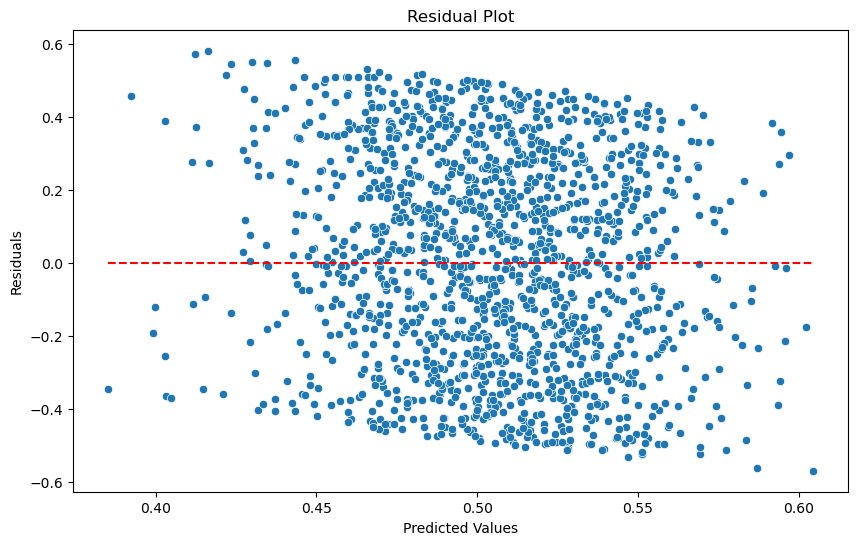

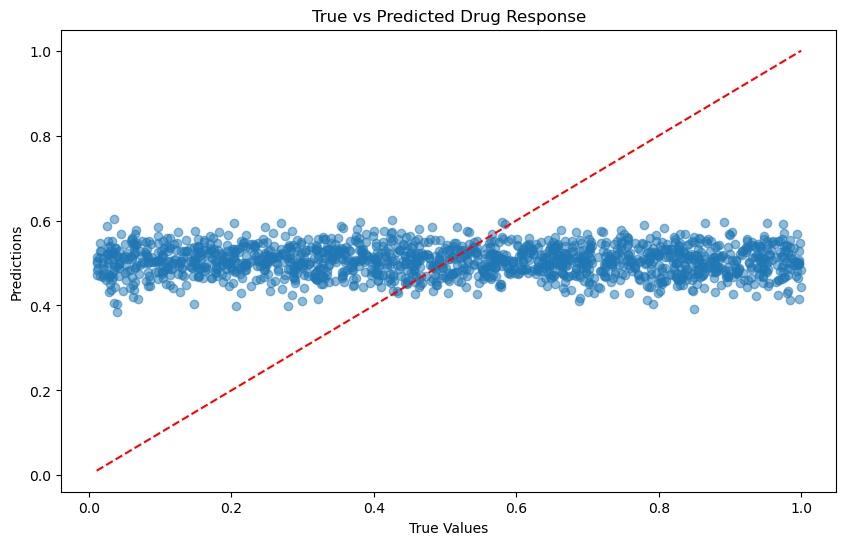

In [ ]:
from sklearn.linear_model import Ridge 

# Initialize the Ridge Regression model
ridge_model = Ridge(alpha=1)

# Fit the model on the training data
ridge_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_train = ridge_model.predict(X_train)
y_pred_test = ridge_model.predict(X_test)
print(y_train, y_pred_train)
print(y_test, y_pred_test)

# Evaluate the model on the training and test data
print("Training Data Evaluation:")
evaluate_model(y_train, y_pred_train, tolerance=0.1)
print("Testing Data Evaluation:")
evaluate_model(y_test, y_pred_test, tolerance=0.1)

# Visualize the predictions
print("Testing Data Visualization:")
visualize_predictions(y_test, y_pred_test)

Ridge regression does very poorly on the dataset, and this independently of the alpha choice. This is probably because it is a non linear relationship. Let's try Random Forest.

#### Random Forest

In [55]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=20, random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)

# Evaluate the model
print("Training Data Evaluation:")
evaluate_model(y_train, y_pred_train, tolerance=0.1)
print("Testing Data Evaluation:")
evaluate_model(y_test, y_pred_test, tolerance=0.1)

Training Data Evaluation:
Mean Squared Error: 0.013467704899846226
R-squared: 0.8328574371053372
Accuracy (within tolerance 0.1): 58.23%
Testing Data Evaluation:
Mean Squared Error: 0.08567667191283546
R-squared: -0.052092925215272645
Accuracy (within tolerance 0.1): 20.93%


Training Data Visualization:


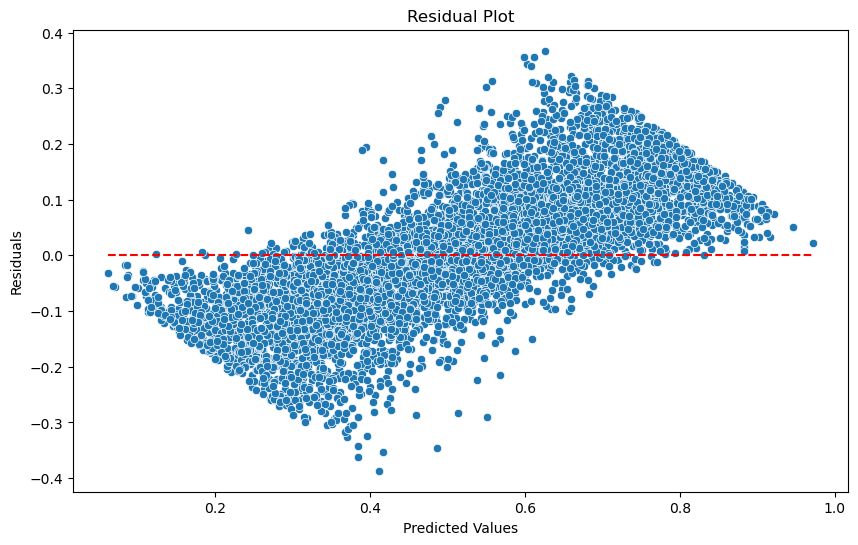

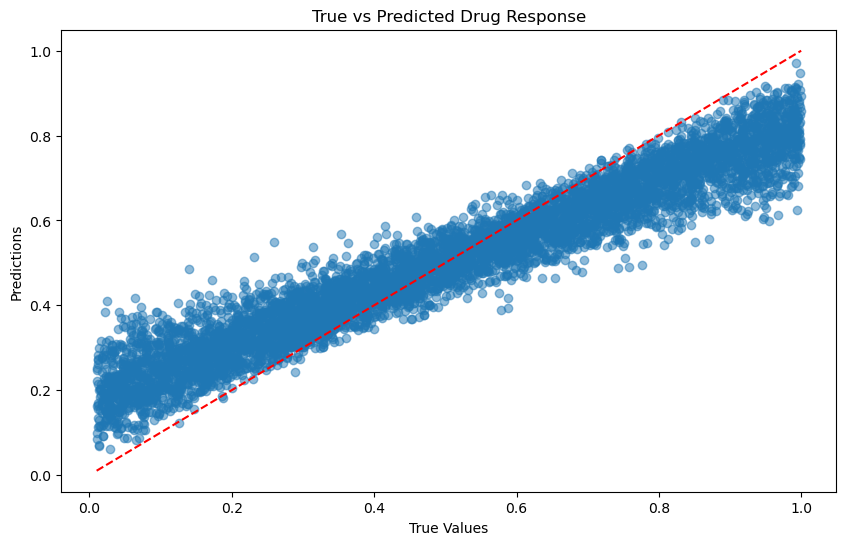

Testing Data Visualization:


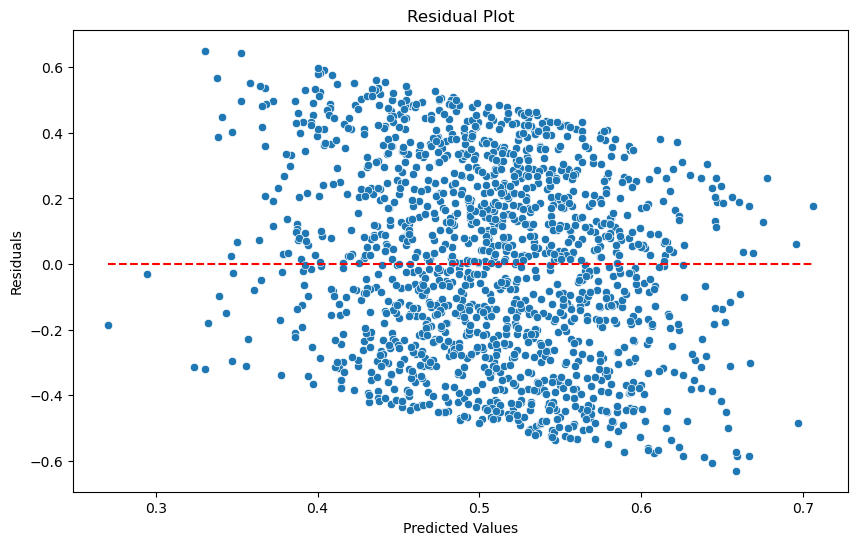

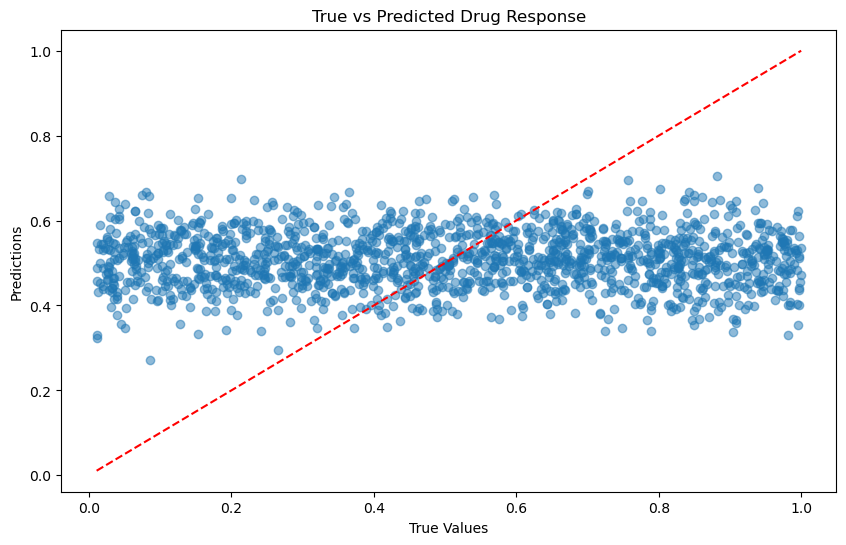

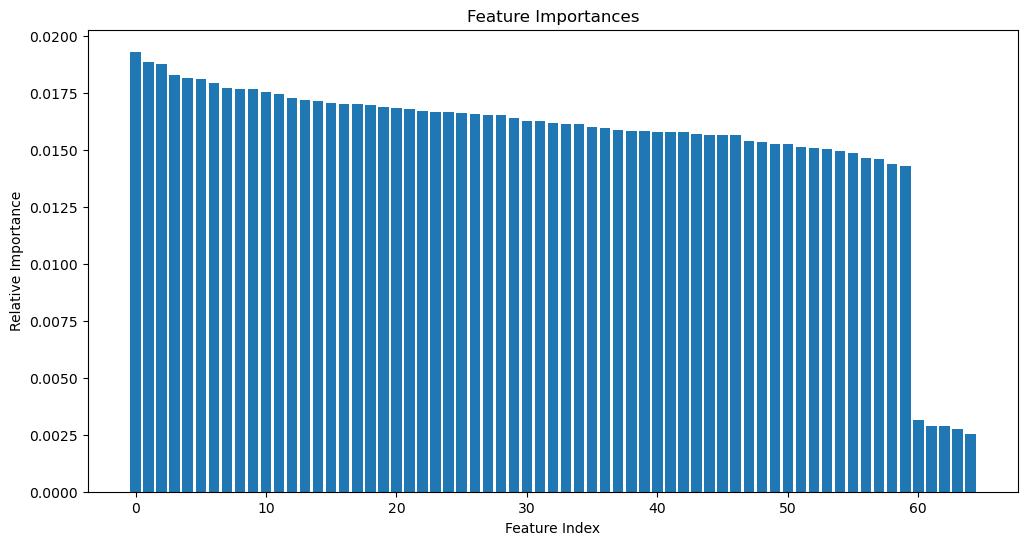

In [56]:
# Visualize the predictions
print("Training Data Visualization:")
visualize_predictions(y_train, y_pred_train)
print("Testing Data Visualization:")
visualize_predictions(y_test, y_pred_test)

# Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xlabel('Feature Index')
plt.ylabel('Relative Importance')
plt.show()

Random Forest does better than Ridge regression, but overfits a lot.

In [52]:
from sklearn.model_selection import GridSearchCV


# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20, None],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Set up the grid search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Evaluate the model with the best parameters
best_model = grid_search.best_estimator_
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

# Evaluate the model
print("Training Data Evaluation:")
evaluate_model(y_train, y_pred_train, tolerance=0.1)
print("Testing Data Evaluation:")
evaluate_model(y_test, y_pred_test, tolerance=0.1)

Best Parameters: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 2, 'n_estimators': 100}
Training Data Evaluation:
Mean Squared Error: 0.06106631099582746
R-squared: 0.24212924159916316
Accuracy (within tolerance 0.1): 22.96%
Testing Data Evaluation:
Mean Squared Error: 0.08179642498678405
R-squared: -0.004444245033807803
Accuracy (within tolerance 0.1): 20.08%


#### Neural Network

In [123]:
import time
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import KFold
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

def timeit(f):
    def timed(*args, **kw):
        ts = time.time()
        result = f(*args, **kw)
        te = time.time()
        print(f'func: {f.__name__} took: {te-ts:.4f} sec')
        return result
    return timed

class ColCanDataset():
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

class Trainer:
    def __init__(self, model, opt_method, learning_rate, batch_size, epoch, l2):
        self.model = model
        if opt_method == "sgdm":
            self.optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
        elif opt_method == "adam":
            self.optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=l2)
        else:
            raise NotImplementedError("This optimization is not supported")

        self.epoch = epoch
        self.batch_size = batch_size

    @timeit
    def train(self, train_data, val_data, early_stop=True, verbose=True, draw_curve=True):
        train_loader = DataLoader(train_data, batch_size=self.batch_size, shuffle=True)

        train_loss_list, train_mse_list = [], []
        val_loss_list, val_mse_list = [], []
        weights = self.model.state_dict()
        lowest_val_loss = np.inf
        loss_func = nn.MSELoss()

        for n in tqdm(range(self.epoch), leave=False):
            self.model.train()
            for X_batch, y_batch in train_loader:
                y_pred = self.model(X_batch)

                batch_loss = loss_func(y_pred.squeeze(), y_batch)

                self.optimizer.zero_grad()
                batch_loss.backward()
                self.optimizer.step()

            train_loss, train_mse, _, _ = self.evaluate(train_data, loss_func)
            train_loss_list.append(train_loss)
            train_mse_list.append(train_mse)

            val_loss, val_mse, _, _ = self.evaluate(val_data, loss_func)
            val_loss_list.append(val_loss)
            val_mse_list.append(val_mse)

            if early_stop:
                if val_loss < lowest_val_loss:
                    lowest_val_loss = val_loss
                    weights = self.model.state_dict()

        if draw_curve:
            self.plot_learning_curves(train_loss_list, val_loss_list, train_mse_list, val_mse_list)

        if early_stop:
            self.model.load_state_dict(weights)

        return {
            "train_loss_list": train_loss_list,
            "train_mse_list": train_mse_list,
            "val_loss_list": val_loss_list,
            "val_mse_list": val_mse_list,
        }

    def evaluate(self, data, loss_func):
        self.model.eval()
        loader = DataLoader(data, batch_size=self.batch_size, shuffle=False)
        mse, loss = 0.0, 0.0
        all_preds, all_trues = [], []
        for X_batch, y_batch in loader:
            with torch.no_grad():
                batch_importance = y_batch.shape[0] / len(data)
                y_pred = self.model(X_batch)

                batch_loss = loss_func(y_pred.squeeze(), y_batch)
                batch_mse = torch.mean((y_pred.squeeze() - y_batch) ** 2)
                loss += batch_loss.item() * batch_importance
                mse += batch_mse.item() * batch_importance

                all_preds.extend(y_pred.squeeze().cpu().numpy())
                all_trues.extend(y_batch.cpu().numpy())

        # Convert lists to numpy arrays for easier manipulation
        all_preds = np.array(all_preds)
        all_trues = np.array(all_trues)

        return loss, mse, all_preds, all_trues

    def plot_learning_curves(self, train_loss, val_loss, train_mse, val_mse):
        x_axis = np.arange(self.epoch)
        fig, axes = plt.subplots(1, 2, figsize=(10, 4))
        axes[0].plot(x_axis, train_loss, label="Train")
        axes[0].plot(x_axis, val_loss, label="Validation")
        axes[0].set_title("Loss")
        axes[0].legend()
        axes[1].plot(x_axis, train_mse, label='Train')
        axes[1].plot(x_axis, val_mse, label='Validation')
        axes[1].set_title("MSE")
        axes[1].legend()
        plt.show()

def plot_residuals(y_true, y_pred):
    # Ensure y_true is a 1D array
    y_true = y_true.flatten()

    residuals = y_true - y_pred
    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.hlines(y=0, xmin=min(y_pred), xmax=max(y_pred), colors='r', linestyles='--')
    plt.title('Residual Plot')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.show()

def plot_predictions(y_true, y_pred): 
    # Ensure y_true is a 1D array
    y_true = y_true.flatten() 

    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], color='red', linestyle='--')
    plt.title('Prediction vs Actual')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.show()

def KFoldCrossValidation(
    model_class, k,
    X_train, y_train, X_test, y_test,
    opt_method='adam', learning_rate=2e-3, batch_size=128, epoch=50, l2=0.0,
    early_break=False,
    **model_args
):
    print(X_train.shape, y_train.shape)
    print(X_test.shape, y_test.shape)
    test_data = ColCanDataset(X_test, y_test)
    kf = KFold(n_splits=k, shuffle=True)
    train_mse_list, test_mse_list = [], []
    for i, (train_index, val_index) in enumerate(kf.split(X_train)):
        print(f"Fold {i}:")

        train_data = ColCanDataset(X_train[train_index], y_train[train_index])
        val_data = ColCanDataset(X_train[val_index], y_train[val_index])

        model = model_class(**model_args)

        trainer = Trainer(model, opt_method, learning_rate, batch_size, epoch, l2)
        res = trainer.train(train_data, val_data)
        train_mse_best = res['train_mse_list'][np.argmin(res['val_loss_list'])]

        # Pass the loss function to evaluate
        loss_func = nn.MSELoss()
        test_loss, test_mse, y_pred, y_true = trainer.evaluate(test_data, loss_func)

        train_mse_list.append(train_mse_best)
        test_mse_list.append(test_mse)

        print(f"Training MSE: {train_mse_best}")
        print(f"Test MSE: {test_mse}")

        # Plot residuals and predictions at the end of each fold
        plot_residuals(y_true, y_pred)
        plot_predictions(y_true, y_pred)
        
        if early_break:
            break

    if not early_break:
        print("Final results:")
        print(f"Training MSE: {np.mean(train_mse_list)}+/-{np.std(train_mse_list)}")
        print(f"Test MSE: {np.mean(test_mse_list)}+/-{np.std(test_mse_list)}")


In [124]:
class ShallowCNN(nn.Module):
    def __init__(self, in_channels=1):
        super(ShallowCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels=3, kernel_size=5, stride=1, padding=2)
        self.relu = nn.ReLU()
        self.flatten = nn.Flatten()
        self.fc = nn.Linear(3 *8 *8, 1)  # Adjust output size to 1 for regression

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.flatten(x)
        x = self.fc(x)
        return x

torch.Size([6114, 1, 8, 8]) torch.Size([6114, 1])
torch.Size([1529, 1, 8, 8]) torch.Size([1529, 1])
Fold 0:


  0%|          | 0/30 [00:00<?, ?it/s]c:\Users\alice\anaconda3\envs\c142\lib\site-packages\torch\nn\modules\loss.py:538: UserWarning: Using a target size (torch.Size([128, 1])) that is different to the input size (torch.Size([128])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\alice\anaconda3\envs\c142\lib\site-packages\torch\nn\modules\loss.py:538: UserWarning: Using a target size (torch.Size([108, 1])) that is different to the input size (torch.Size([108])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\alice\anaconda3\envs\c142\lib\site-packages\torch\nn\modules\loss.py:538: UserWarning: Using a target size (torch.Size([118, 1])) that is different to the input size (torch.Size([118])). This will likely lead to incorrect results due

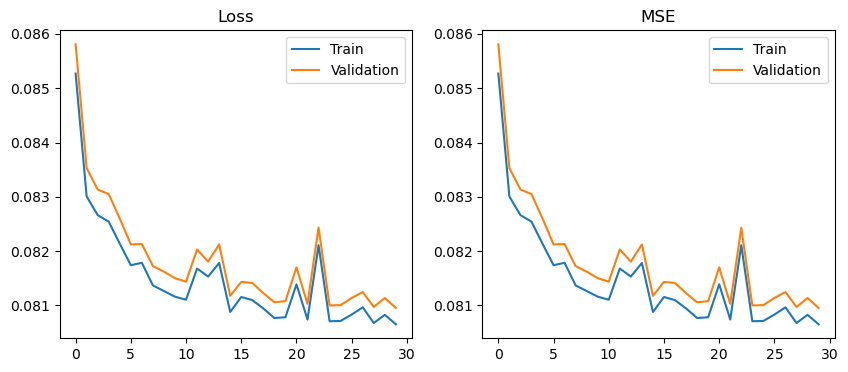

func: train took: 9.5537 sec
Training MSE: 0.08065392107678117
Test MSE: 0.08161717963674787


c:\Users\alice\anaconda3\envs\c142\lib\site-packages\torch\nn\modules\loss.py:538: UserWarning: Using a target size (torch.Size([121, 1])) that is different to the input size (torch.Size([121])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


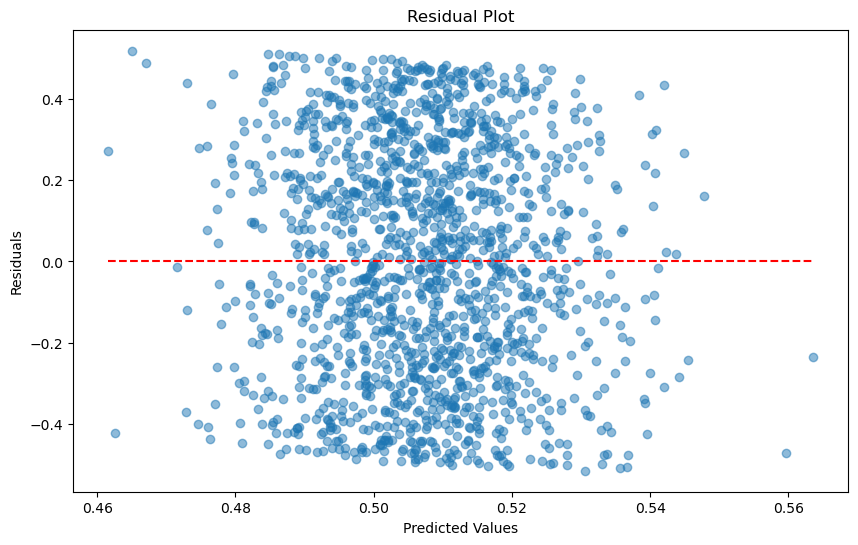

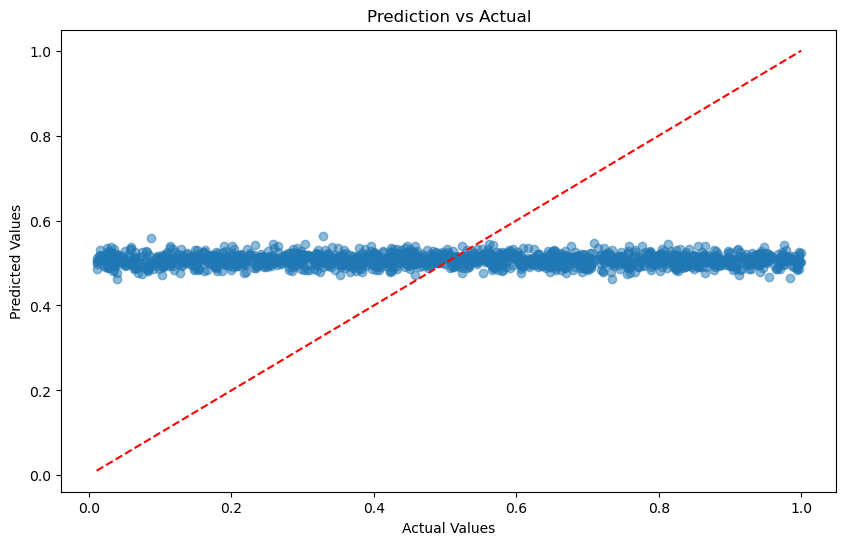

Fold 1:


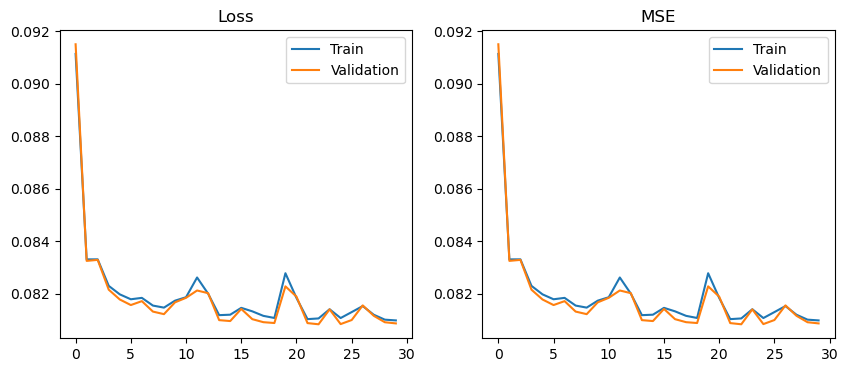

func: train took: 9.4872 sec
Training MSE: 0.08105989985014436
Test MSE: 0.08180239725982232


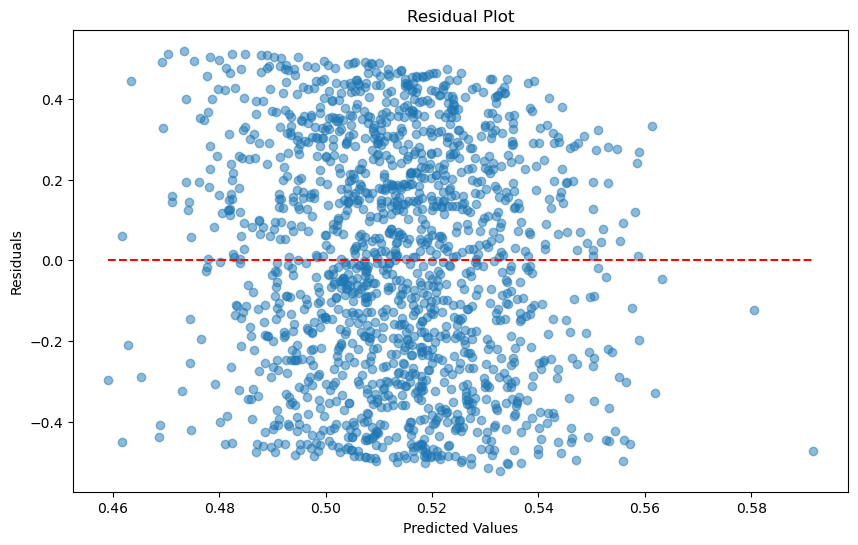

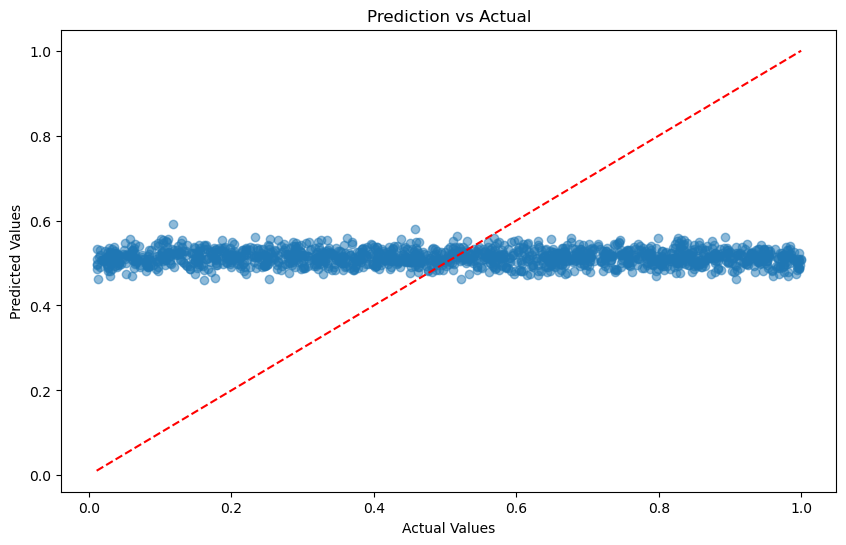

Fold 2:


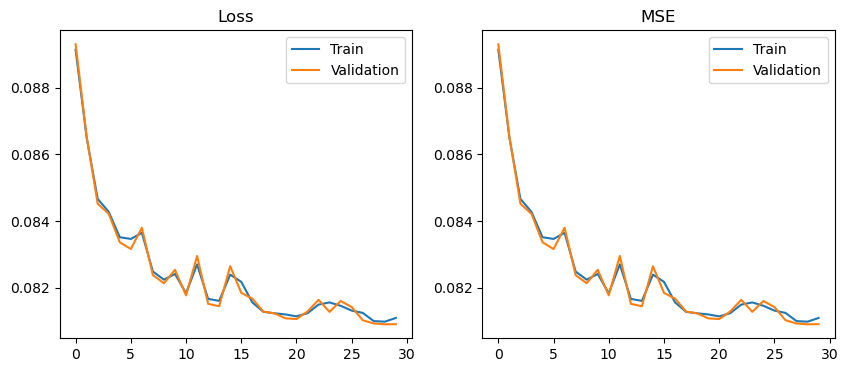

func: train took: 9.6614 sec
Training MSE: 0.08098771708256126
Test MSE: 0.08187679303206986


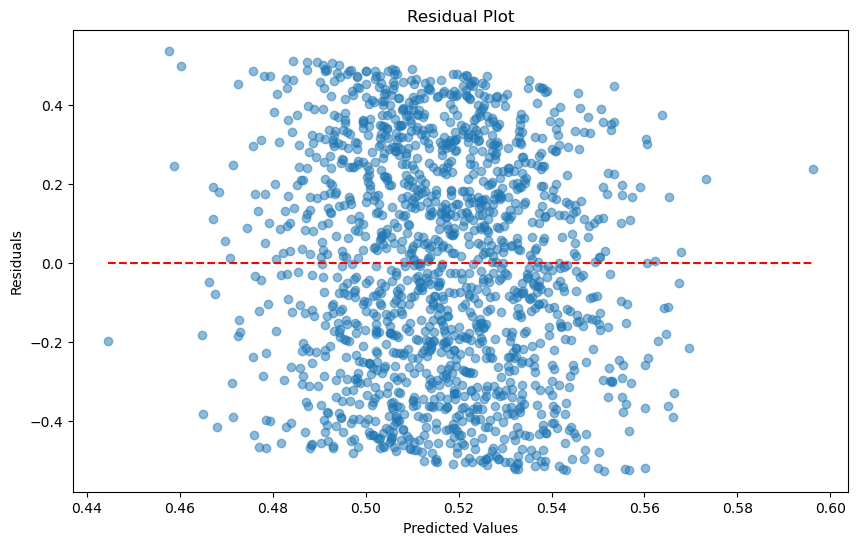

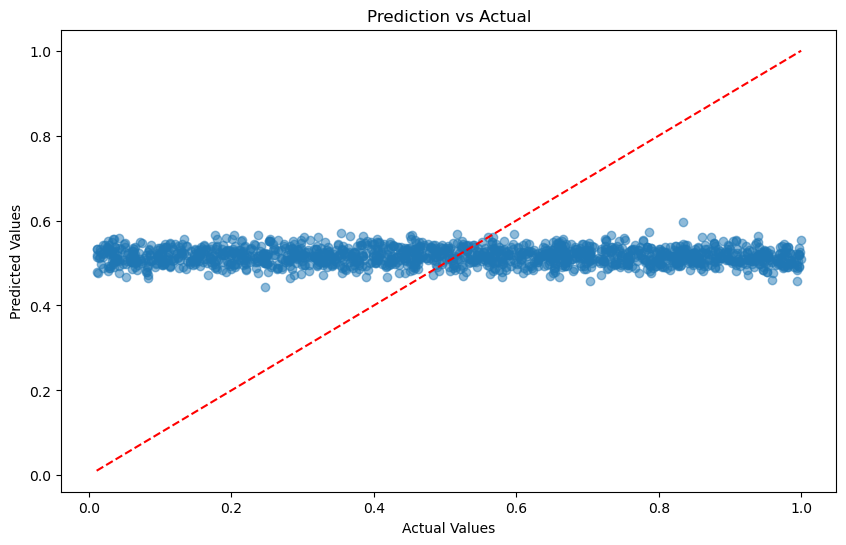

Final results:
Training MSE: 0.08090051266982894+/-0.0001768391892942365
Test MSE: 0.08176545664288003+/-0.00010915809831832917


In [125]:
def convert_to_tensor(data):
    if not isinstance(data, torch.Tensor):
        return torch.tensor(data.values, dtype=torch.float)
    return data

def reshape_input(X, y):
    """
    Reshape input X to shape [N, 1, 8, 8] from first 64 features.
    y stays as [N, 1].
    """
    X_reshaped = X[:, :64].reshape(-1, 1, 8, 8)
    return X_reshaped, y

# Convert data to PyTorch tensors if not already converted
X_train = convert_to_tensor(X_train)
X_test = convert_to_tensor(X_test)
y_train = convert_to_tensor(y_train)
y_test = convert_to_tensor(y_test)

# Reshape into CNN-compatible format
X_train, y_train = reshape_input(X_train, y_train)
X_test, y_test = reshape_input(X_test, y_test)


k=3
model_class=ShallowCNN
KFoldCrossValidation(
    model_class, k, 
    X_train, y_train, X_test, y_test, 
    opt_method='adam', learning_rate=1e-3, batch_size=128, epoch=30)

## Regularization strategies and hyperparameter tuning

## Production mode

## Final Results